# Tarea 2: 

_Rodolfo Arturo González Trillo_


---

Se inicia cargando los paquetes que se usaran. `Interact` es un paquete de macros que, como su nombre lo dice, permite _interactividad_, y es justo por eso que se usa, para generar gráficos interactivos.

In [1]:
#Pkg.update()
#Pkg.add("Interact")

using PyPlot
using Interact


> 1) Consideren la función $ z_{n+1} = z_n^2 + c $ con `c = 0.12256484161600012 - 0.74486407104im`. Definan una malla de valores iniciales $z_0$ en el intervalo $[-1,1]\times [-1,1]$ (parte real $\times$ parte imaginaria).



Usando como referencia la estrucutura para generar matrices de la función `compute_complex_roots` del notebook 04, pero se cambia la parte del metodo de Newton, se define la función `recursive_complex_matrix`:

In [2]:
"""
recursive_complex_matrix( f, N, range)

Está función genera una matriz con los valores z_N de una función recursiva de
la forma `f(z_n)` = z_{n+1}, en una matriz cuadrada compleja en el rango pro-
porcionado.

"""

function recursive_complex_matrix(f::Function, N::Int64, range::Range)
    
    L = length(range)
    
    # Se define una matriz cuadrada con todos los elementos cero, que más tarde 
    # será llenada conlos valores del cálculo que realizaremos.
    matriz = zeros(Complex128,L,L)
    
        for (j, x) in enumerate(range)
        for (i, y) in enumerate(range)
            
            z = x + y*im
            
            for k in 1:N
                z = f(z)  #Aquí está la función recurrente.
            end
            
            matriz[i,j] = z
            
        end
    end
    
    matriz
end

recursive_complex_matrix (generic function with 1 method)

Ahora, se define la función recursiva $ z_{n+1} = z_n^2 + c $, con la $c$ dada en el cuerpo del problema:

In [3]:
f(z)=z^2+0.12256484161600012 - 0.74486407104im

f (generic function with 1 method)

> - ¿Cuantos valores finitos distintos (en el intervalo $[-1,1]\times [-1,1]$) se pueden obtener después de un gran número de iteraciones?

Ésto se puede verificar con las dos funciones previamente definidas, insertando un valor alto de `N`, el número de iteraciones:

In [4]:
m_valores = recursive_complex_matrix(f, 75, -1:0.01:1 )

201x201 Array{Complex{Float64},2}:
 NaN+NaN*im  NaN+NaN*im  NaN+NaN*im  …  NaN+NaN*im  NaN+NaN*im  NaN+NaN*im
 NaN+NaN*im  NaN+NaN*im  NaN+NaN*im     NaN+NaN*im  NaN+NaN*im  NaN+NaN*im
 NaN+NaN*im  NaN+NaN*im  NaN+NaN*im     NaN+NaN*im  NaN+NaN*im  NaN+NaN*im
 NaN+NaN*im  NaN+NaN*im  NaN+NaN*im     NaN+NaN*im  NaN+NaN*im  NaN+NaN*im
 NaN+NaN*im  NaN+NaN*im  NaN+NaN*im     NaN+NaN*im  NaN+NaN*im  NaN+NaN*im
 NaN+NaN*im  NaN+NaN*im  NaN+NaN*im  …  NaN+NaN*im  NaN+NaN*im  NaN+NaN*im
 NaN+NaN*im  NaN+NaN*im  NaN+NaN*im     NaN+NaN*im  NaN+NaN*im  NaN+NaN*im
 NaN+NaN*im  NaN+NaN*im  NaN+NaN*im     NaN+NaN*im  NaN+NaN*im  NaN+NaN*im
 NaN+NaN*im  NaN+NaN*im  NaN+NaN*im     NaN+NaN*im  NaN+NaN*im  NaN+NaN*im
 NaN+NaN*im  NaN+NaN*im  NaN+NaN*im     NaN+NaN*im  NaN+NaN*im  NaN+NaN*im
 NaN+NaN*im  NaN+NaN*im  NaN+NaN*im  …  NaN+NaN*im  NaN+NaN*im  NaN+NaN*im
 NaN+NaN*im  NaN+NaN*im  NaN+NaN*im     NaN+NaN*im  NaN+NaN*im  NaN+NaN*im
 NaN+NaN*im  NaN+NaN*im  NaN+NaN*im     NaN+NaN*im  NaN+NaN*im  N

Aplicando la función `minimum`, que en caso de que uno de los valores fuera distinto de un `NaN` nos devolvería ese valor, observamos que tal cantidad no existe.

In [5]:
minimum(m_valores)

NaN + NaN*im

> - Usando un color distinto para cada uno, grafiquen en el plano $\textrm{Re}(z) - \textrm{Im}(z)$ el conjunto obtenido.

Interact.Slider{Int64}(Signal{Int64}(5, nactions=0),"n",5,1:10,true)

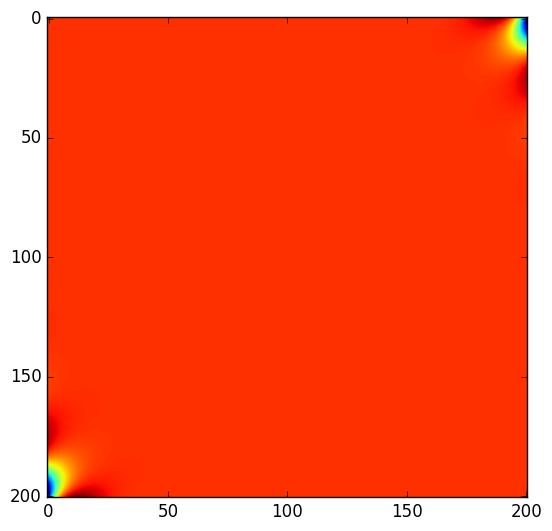

In [6]:
fig = figure()

@manipulate for n in 1:10
    m_valores = recursive_complex_matrix(f, n, -1:0.01:1 )
    withfig(fig) do
        imshow(real(m_valores)-imag(m_valores))
    end
end

Se observa que hay zonas con valores menores que otras bien definidas, y se difuminan en una zona con NaN.

2) Usando la función `compute_roots` vista en clase, o en alguna variación propuesta por ustedes, definan (en Julia) el mapeo

\begin{equation}
x_{n+1} = B(x_{n}) = 2x_n \mod 1.
\end{equation}

*Hint: Sean imaginos y no se conformen*

- Obtengas los puntos fijos de este mapeo numéricamente. Los puntos fijos del mapeo son aquéllos que se mapean en si mismos, es decir, $x_{n} = B(x_{n})$. Este cálculo se puede hacer a mano, lo que debe usarse para comprobar que la implementación numérica funciona bien.

La función `compute_roots`, del Notebook 4 aplica el método de Newton que requiere la función y su derivada.

In [209]:
"""
    compute_roots(f, f´,initial_conditions)

Calcula las raíces mediante método de newton de una función `f` y su derivada `f'`, dadas unas
condiciones iniciales `initial_conditions` de tipo `Range`.
"""

function compute_roots(f, f´, initial_conditions)
    roots = similar(initial_conditions)

    for (j, x_0) in enumerate(initial_conditions)
        x = x_0

        # 500 iterations of Newton's method
        for i in 1:500
            x = x - f(x) / f´(x)
        end

        roots[j] = x
    end
    
    roots
end

compute_roots (generic function with 2 methods)

Definimos la función que nos otorgue valores $x_{n+1}$ de la forma $g(x,N)=x_{N}=B(x_{N-1})$

In [156]:
function g(x_0::Real, N::Int64)
    @assert N ≥ 1
    
    x=x_0
    
    for i in 1:N-1
        x = mod((2*x),1)
    end
    
    x
end

g (generic function with 1 method)

Graficamos la función para observar su comportamiento, junto con la función identidad para identificar los puntos que cumplen con la condición $x=B(x)$

Interact.Slider{Int64}(Signal{Int64}(10, nactions=0),"n",10,1:20,true)

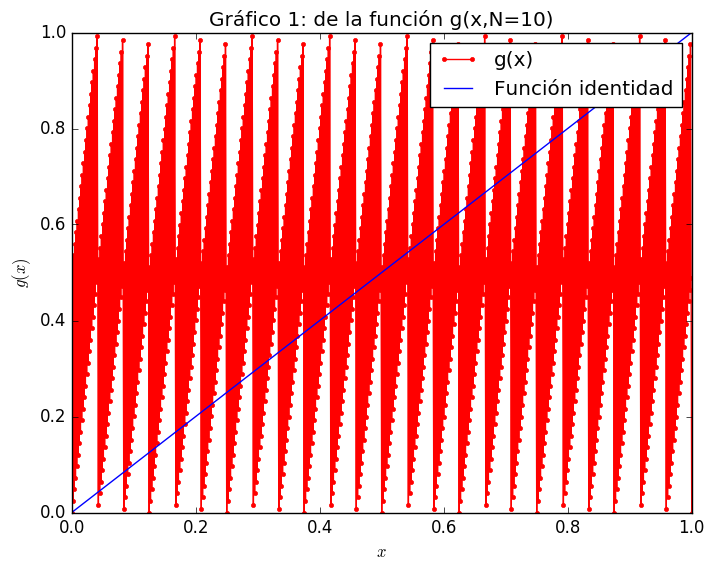

In [200]:
fig = figure()

@manipulate for n in 1:20

    xs = 0:0.001:1
    gs = zeros(length(xs))

    for (j,x) in enumerate(xs)
        gs[j] = g(x,n)
    end

    withfig(fig) do
        plot(collect(xs),gs,"r.-", label="g(x)")
        plot(collect(xs),collect(xs),label="Función identidad")

        title("Gráfico 1: de la función g(x,N=$n)")
        xlabel(L"$x$")
        ylabel(L"$g(x)$")
        legend()
        
    end
end

Ahora, graficamos al revés, para ver si el a cierto valor de $N$, la solución converge:

Observamos que en general, para $N$ grande, la función se va a 0.

Se utiliza la derivada númerica, de la forma:

$$ f'(x)\approx \frac{f(x+h)-f(x-h)}{2h}$$

Debido a que la derivación de la función módulo no es trivial.

In [210]:
"""
    numder(f,x)

Calcula la derivida númerica de una función `f` en un punto `x`, con la defini-
ción de derivada, con `h=0.5e-07`.
"""

function numder(f,x)
    h = 1e-07
    
    (f(x+h)-f(x-h))/(2*h)
    
end


numder (generic function with 1 method)

Para poder encontrar los puntos fijos numericamente, con la función ´compute_roots´ se usa la función.

$$g_{roots}(x)=g(x,N)-x$$

y su derivada númerica $dg_{roots}$

In [207]:
n=14           #Valor de N.

groots(x) = g(x,n) - x
dgroots(x) = numder(groots,x)


dgroots (generic function with 1 method)

Se calculan las raíces con la función, y obtenemos los puntos fijos. Es conveniente dividir el intervalo en $2^{(N-1)}$ partes, debido a que es el número de raíces, esta conclusión se obtiene de ver el gráfico 2 y cambiar el valor de N.

In [202]:
compute_roots(groots, dgroots, 0:1/2^(n-1):1)

8193-element Array{Float64,1}:
 0.0        
 0.000122085
 0.00024417 
 0.000366256
 0.000488341
 0.000610426
 0.000732511
 0.000854597
 0.000976682
 0.00109877 
 0.00122085 
 0.00134294 
 0.00146502 
 ⋮          
 0.998657   
 0.998779   
 0.998901   
 0.999023   
 0.999145   
 0.999267   
 0.99939    
 0.999512   
 0.999634   
 0.999756   
 0.999878   
 1.0        

Los puntos fijos dependen de $N$

- Pensando en que la estabilidad de un punto fijo es el comportamiento que se observa de los iterados (a priori un número infinito) al considerar pequeñas desviaciones del punto fijo, ¿cuál es la estabilidad de los puntos fijos que se obtiene *numéricamente*, digamos, después de 100 iteraciones? ¿Pueden encontrar una explicación analítica de la observación numérica?

Graficamos ahora fijando la x y cambiando la n:

Interact.Slider{Float64}(Signal{Float64}(0.5, nactions=0),"x",0.5,0.0:0.05:1.0,true)

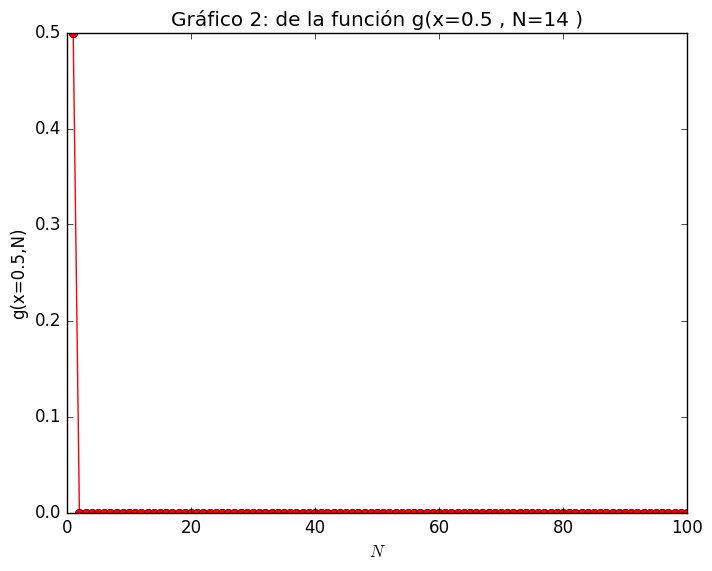

In [205]:
fig = figure()
@manipulate for x in 0:0.05:1        
    Ns = 1:1:100
    gs = zeros(length(Ns))

    for (j,n) in enumerate(Ns)

        gs[j] = g(x,n)
    end

    withfig(fig) do
        plot(collect(Ns),gs,"ro-")

        title("Gráfico 2: de la función g(x=$x , N=$n )")
        xlabel(L"$N$")
        ylabel("g(x=$x,N)")
        legend()
    end
    
end

Observamos que en el intervalo, para $N$ grande, el valor de todos los puntos tiende a 0.

Como los puntos fijos dependen de N, y varían mucho hasta que N es lo suficientemente grande, entonces ningún punto fijo es estable, salvo el 0, que para cualquier N no varia.
